# data source

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
os.getcwd()

'D:\\fruad_detection'

In [3]:
ls

 Volume in drive D is Data
 Volume Serial Number is 125B-8C1E

 Directory of D:\fruad_detection

26-Jul-22  10:56 AM    <DIR>          .
23-Jul-22  07:39 PM    <DIR>          .ipynb_checkpoints
26-Jul-22  06:41 AM             2,580 app.py
26-Jul-22  06:41 AM           413,044 classifier.pkl
20-Jul-22  02:21 PM             1,298 Data Dictionary.txt
20-Jul-22  05:39 PM       493,534,783 Fraud.csv
26-Jul-22  10:56 AM         1,303,570 fraud_detection.ipynb
20-Jul-22  06:22 PM           260,381 Screenshot (354).png
20-Jul-22  02:19 PM           479,882 Task Details.pdf
23-Jul-22  07:45 PM             2,217 Untitled.ipynb
               8 File(s)    495,997,755 bytes
               2 Dir(s)  992,514,711,552 bytes free


In [4]:
data = pd.read_csv(r"D:\fruad_detection\Fraud.csv")

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
context = open("Data Dictionary.txt","r")
print(context.read())
context.close()

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to anot

In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Here Data Dicitionary.txt file gives the descripition about the columns of the data set 

In [8]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
data.shape

(6362620, 11)

number of rows = 6362620 and number of columns = 11

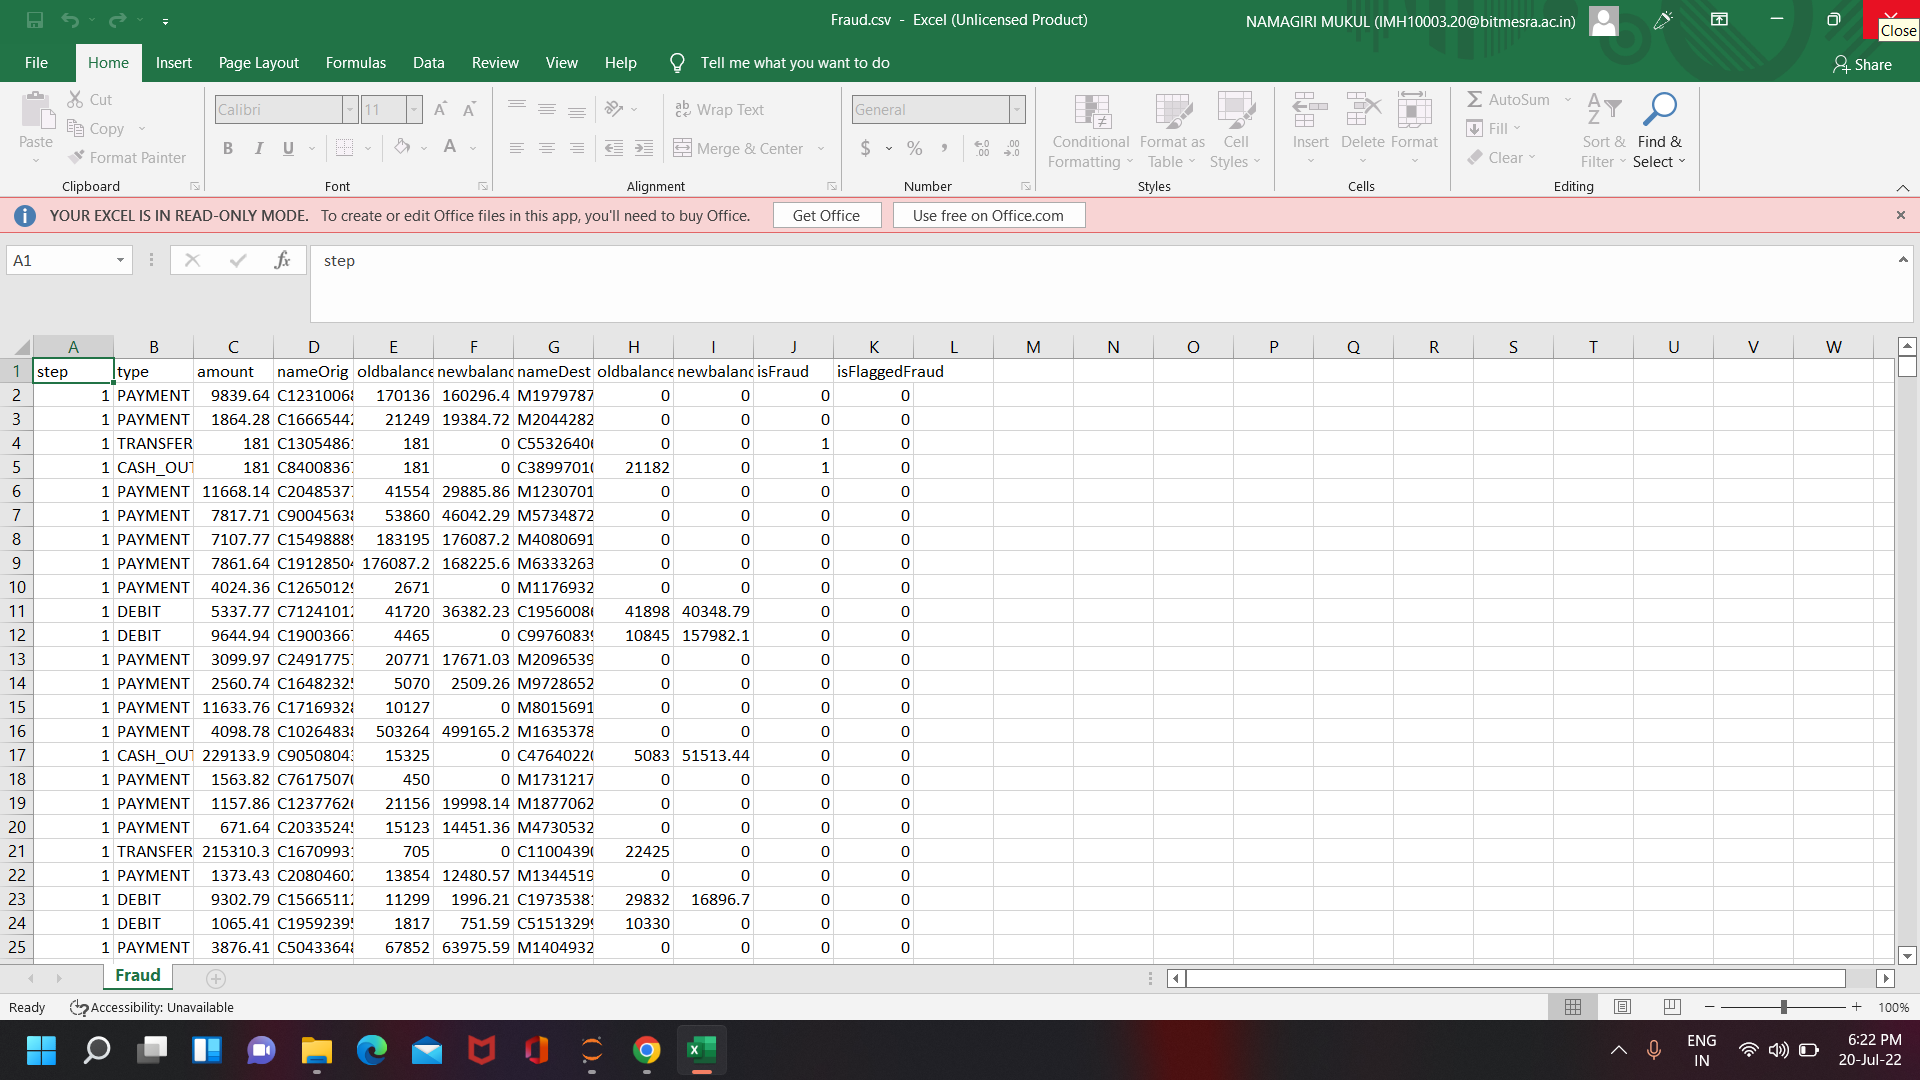

In [10]:
from IPython.display import Image, display
display(Image("Screenshot (354).png"))

there are indeed 11 columns in the csv file the Business context should be corrected

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## types of columns

In [12]:
def find_catcol():
    num_cols = data._get_numeric_data().columns
    cate_cols = list(set(data.columns)-set(num_cols))
    return cate_cols
c = find_catcol()
c

['nameDest', 'nameOrig', 'type']

In [13]:
df_cols = data.columns
def nunique():
    for i in df_cols:
          print(i , data[i].nunique())
nunique()

step 743
type 5
amount 5316900
nameOrig 6353307
oldbalanceOrg 1845844
newbalanceOrig 2682586
nameDest 2722362
oldbalanceDest 3614697
newbalanceDest 3555499
isFraud 2
isFlaggedFraud 2


In [14]:
743/24

30.958333333333332

In [15]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### here 1 step indicate 1 hour in real time there are 743 steps which aprox indicate a moth of transaction history 

In [16]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
num = data[c]
num.describe()

,nameDest,nameOrig,type
count,6362620,6362620,6362620
unique,2722362,6353307,5
top,C1286084959,C1065307291,CASH_OUT
freq,113,3,2237500


### nameOrig > nameDest which indicate that the people who are initiating the payment is greater than who are recieving which indicate income inequality

In [18]:
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### cash out seems to be the most frequent type of transaction methods

In [19]:
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar",figsize=(5,5))
def pie_chart(feature):
    data[feature].value_counts().plot(kind="pie",figsize=(10,10))

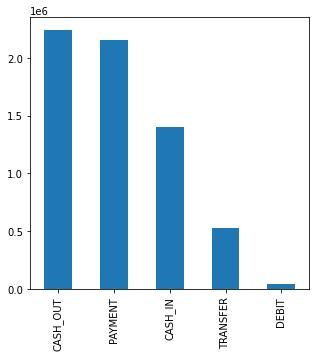

In [20]:
bar_graph("type")

In [21]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [22]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

### The current method of flagging fruad needs to be improved because the number of isfalgged fruad is quite low compared to is fruad

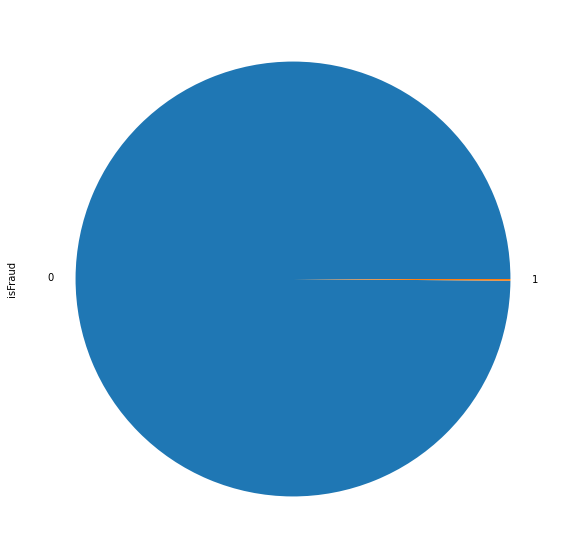

In [23]:
pie_chart("isFraud")

In [24]:
data1 = data

#### comparing the "type " of the fradulent transactions and there distibution

<AxesSubplot:xlabel='amount', ylabel='type'>

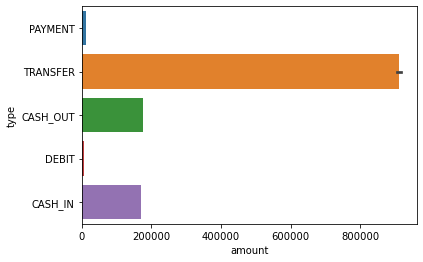

In [25]:
sns.barplot(y='type', x='amount', data=data1)

<AxesSubplot:xlabel='amount', ylabel='type'>

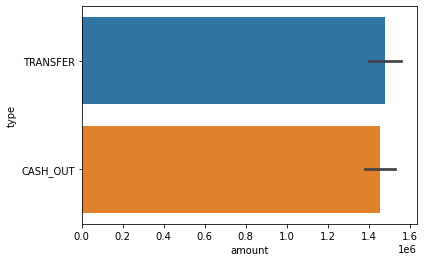

In [26]:
fax = data1[(data1["isFraud"]==1)]
sns.barplot(y='type', x='amount', data=fax)

#### cash out and transfer consitute most amount frauded by this methods

In [27]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [28]:
data.loc[0:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


### according to the descripition of the data set if the recipient is a merchant the account balance to them before and after the transaction is zero

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

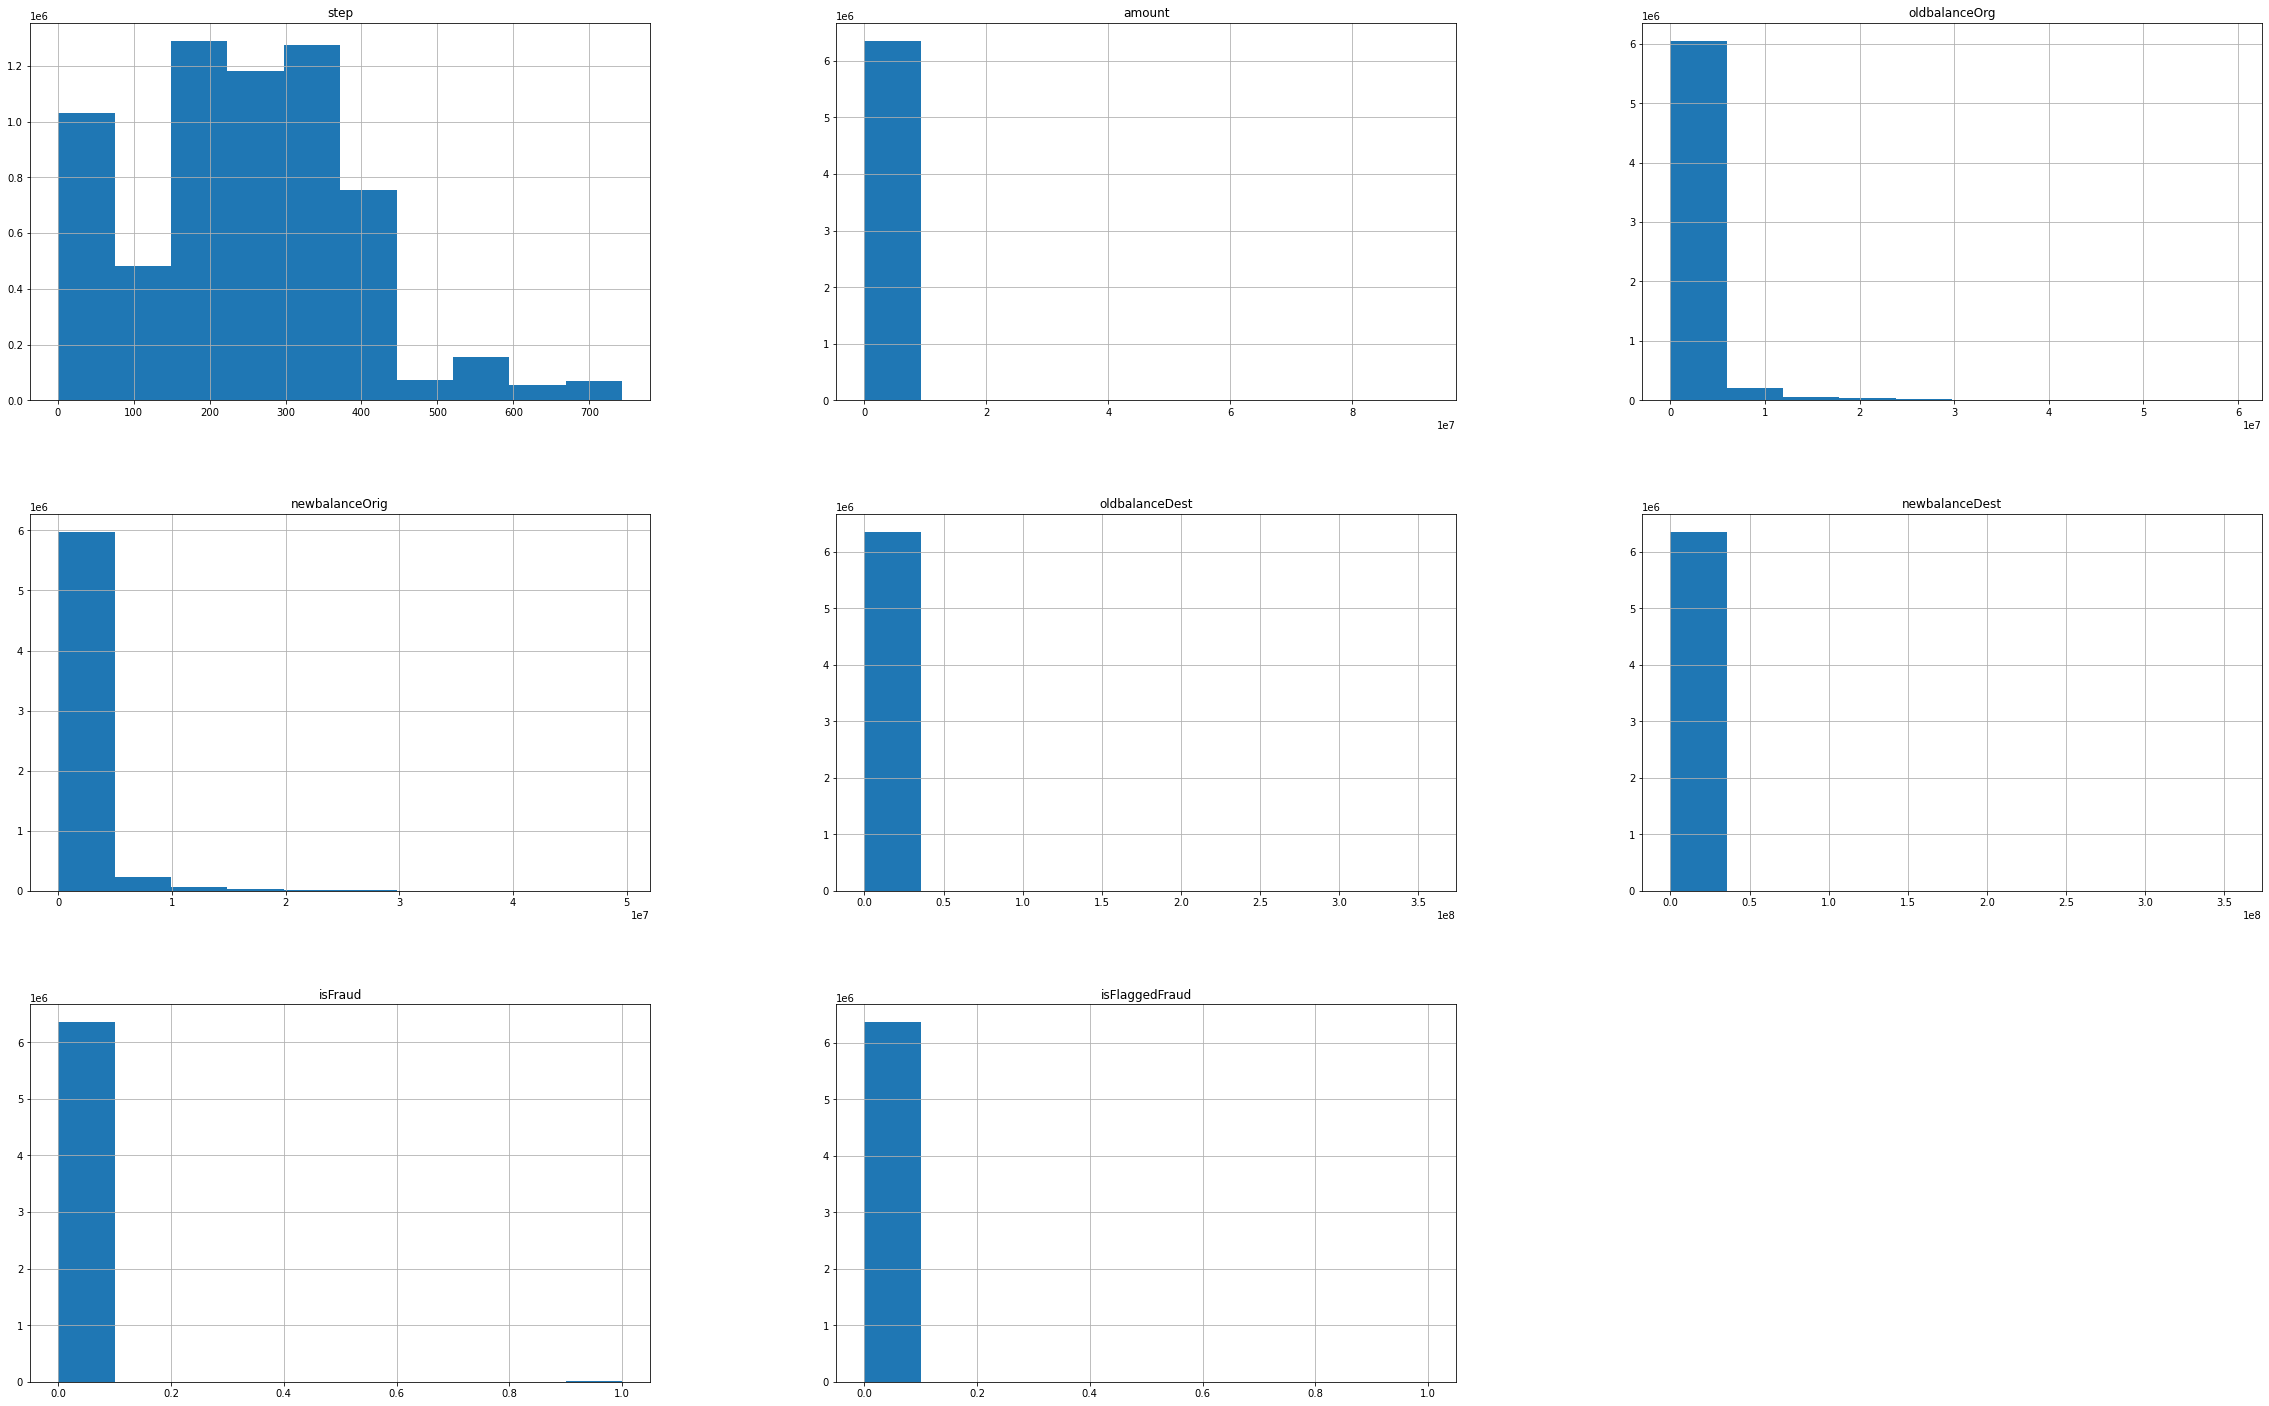

In [29]:
data.hist(bins=10, figsize=(40,25))

In [30]:
lis = []
for i in data.columns:
    if i not in c:
        lis.append(i)

cat = data[lis]
cat.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0


C:\Users\Mukul\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


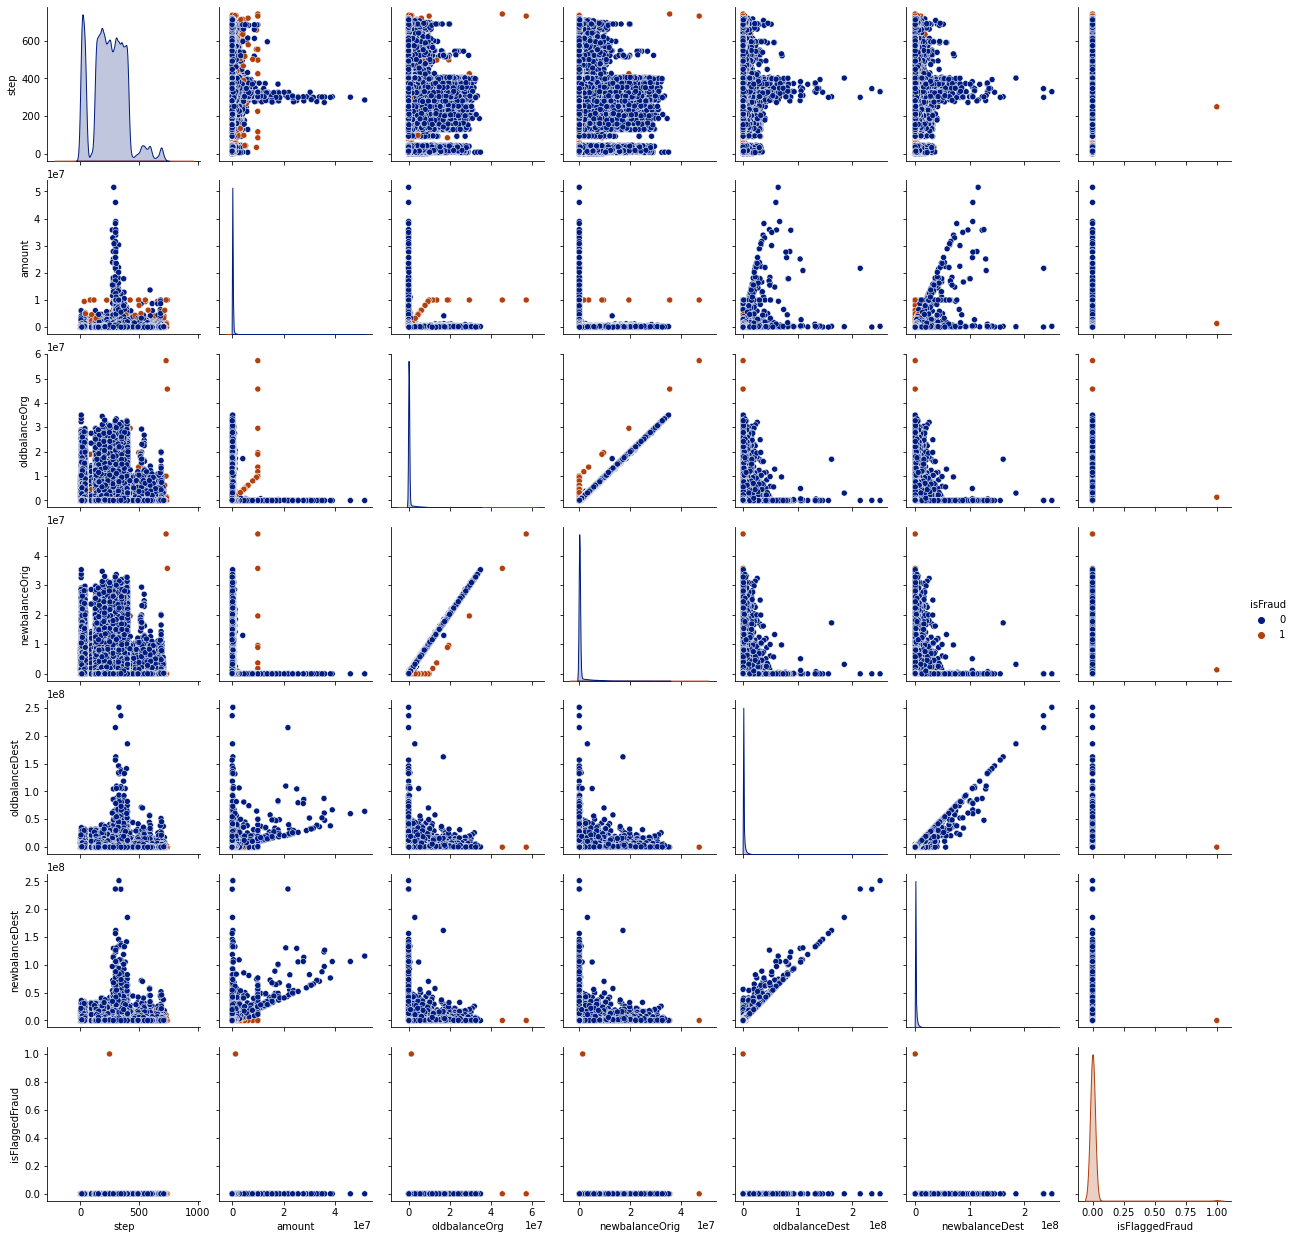

In [31]:
sns.pairplot(cat.sample(200000),hue = "isFraud",palette ='dark')

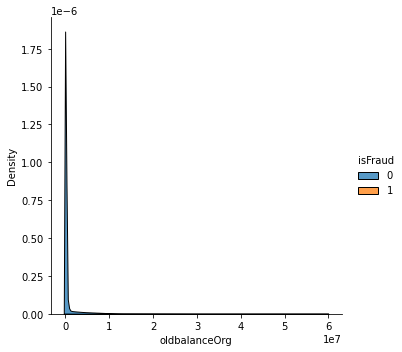

In [32]:
sns.displot(data, x="oldbalanceOrg", hue="isFraud", kind="kde", multiple="stack")

In [33]:
lis.remove("isFraud")
lis.remove("isFlaggedFraud")
cat1 = data[lis]

In [34]:
cat1.skew()

step               0.375177
amount            30.993949
oldbalanceOrg      5.249136
newbalanceOrig     5.176884
oldbalanceDest    19.921758
newbalanceDest    19.352302
dtype: float64

<AxesSubplot:>

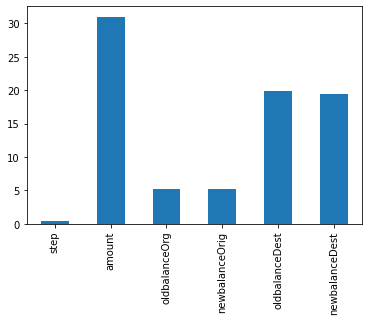

In [35]:
cat1.skew().plot(kind = 'bar')

### every variable except step is highly right skewed

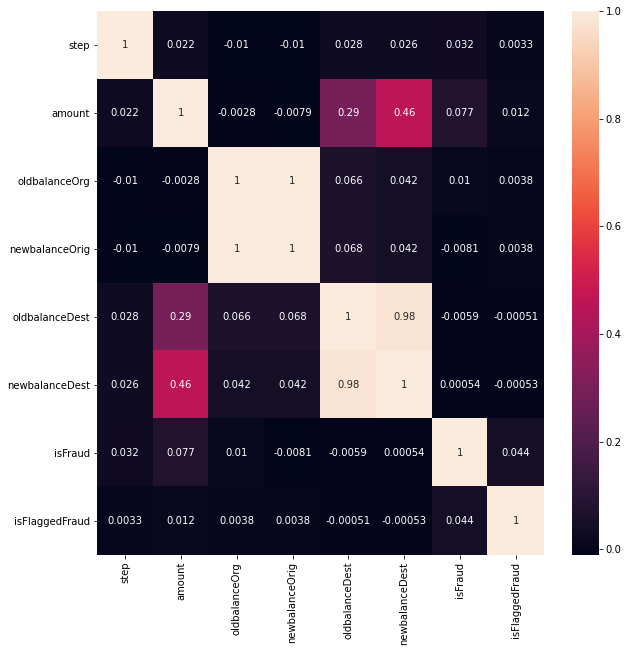

In [36]:
corrMatrix = data.corr()
f , ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrMatrix  , annot = True)
plt.show()

# shows high correlation
## 1 oldbalaceorig and newbalanceorig 2 old balancedest and newbalancedest    
as expected since the new balnce is just the amount + oldbalance these seem to show high correlation this can be avoided by feature engineering


### checking if the amount matches with the account balance for the customer who initiated the transaction

In [37]:
cat1.loc[cat1["amount"]!=(cat1["newbalanceOrig"]-cat1["oldbalanceOrg"])]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,850002.52,850002.52,0.00,0.00,0.00


### since the values don't add up and are not equal there seems to be a transaction charge |

In [38]:
cat1["tran"] = (cat1["oldbalanceOrg"]-cat1["newbalanceOrig"])-cat1["amount"]

<ipython-input-38-035bf1bfa793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat1["tran"] = (cat1["oldbalanceOrg"]-cat1["newbalanceOrig"])-cat1["amount"]


In [39]:
cat1.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tran
0,1,9839.64,170136.00,160296.36,0.0,0.00,1.455192e-11
1,1,1864.28,21249.00,19384.72,0.0,0.00,-1.136868e-12
2,1,181.00,181.00,0.00,0.0,0.00,0.000000e+00
3,1,181.00,181.00,0.00,21182.0,0.00,0.000000e+00
4,1,11668.14,41554.00,29885.86,0.0,0.00,0.000000e+00
5,1,7817.71,53860.00,46042.29,0.0,0.00,-9.094947e-13
6,1,7107.77,183195.00,176087.23,0.0,0.00,-1.091394e-11
7,1,7861.64,176087.23,168225.59,0.0,0.00,1.364242e-11
8,1,4024.36,2671.00,0.00,0.0,0.00,-1.353360e+03
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,-3.637979e-12


In [40]:
7817.71 - (53860.00 - 46042.29)

9.094947017729282e-13

<AxesSubplot:xlabel='tran', ylabel='amount'>

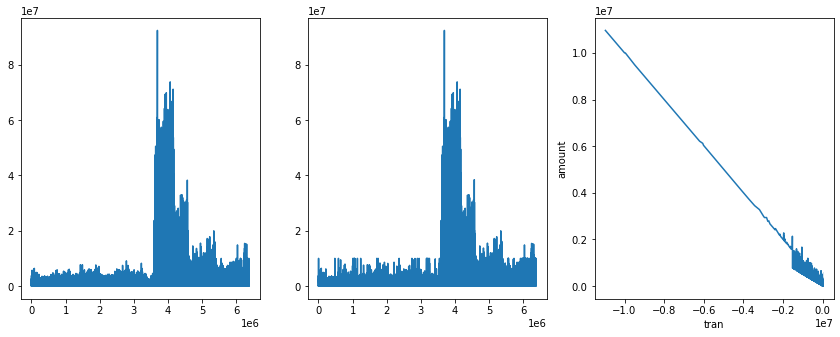

In [41]:
plt.subplot(5,6,1)
abs(cat1["tran"]).plot(figsize = (30,30))
plt.subplot(5,6,2)
cat1["amount"].plot()
plt.subplot(5,6,3)
sns.lineplot(x="tran", y="amount", data=cat1.sample(10000))

#### both transaction charge and the amount clearly show a linear relation 

#### details of the comapny

In [42]:
cat["tran"] = (cat["oldbalanceOrg"]-cat["newbalanceOrig"])-cat["amount"]
rev = abs(cat["tran"].sum())
print(rev)
t = cat[(cat['isFraud'] == 1)& (cat['isFlaggedFraud'] == 0)]
f = t["amount"].sum()
print(f)
profit = rev - f
print(profit)

<ipython-input-42-8b4d373ed45b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat["tran"] = (cat["oldbalanceOrg"]-cat["newbalanceOrig"])-cat["amount"]


1279474959084.858
11978629864.15
1267496329220.708


#### 1279474959084.858 is the revenue of the company and 11978629864.15 is the amount lost due to fruad and 1267496329220.708 is the profit 

In [43]:
def merchant(df,col):
    count = 0
    for i in list(df[col]):
        if i[0] == "M":
            count = count + 1
    print(count)   

In [44]:
merchant(data1,'nameOrig')
merchant(data1,"nameDest")

0
2151495


#### the person who ever initiated the transaction(sender) his nameOrig and account history is always shown and also he coont be a merchant only reciever can be a merchant

#### checking if indeed all the merchant transaction history is indeed not shown

In [45]:
g = list(data1["nameDest"])
h = list(data1["newbalanceDest"])
count = 0
for i in range(len(g)):
    t = g[i]
    if t[0] == "M":
        if h[i] != 0:
            count = count + 1
print(count)

0


yes every merchant transaction is marked as zero

### checking to convert the nameOrig and nameDest to clusters they might contain information about the branch of bank or device the coustomer used for transaction

In [46]:
no = list(data1["nameOrig"])
no1 = []
nd = list(data1['nameDest'])
nd1 = []
for i in no:
    if i[0] == "C":
        i = i+'0'
        i = i[1:]
        i = int(i)
        no1.append(i)
for i in nd:
    if i[0] == "C":
        i = i+'0'
        i = i[1:]
        i = int(i)
        nd1.append(i)
    elif i[0] == "M":
        i = i+'1'
        i = i[1:]
        i = int(i)
        nd1.append(i)
    

In [47]:
cldf = pd.DataFrame(
    {'nameorig': no1,
     'namedest': nd1,
    })
cldf

,nameorig,namedest
0,12310068150,19797871551
1,16665442950,20442822251
2,13054861450,5532640650
3,8400836710,389970100
4,20485377200,12307017031
...,...,...
6362615,7864844250,7769192900
6362616,15290082450,18818418310
6362617,11629223330,13651258900
6362618,16859950370,20803885130


my computer could not handle computations to calculate clustering but we might keep the columns to add later on ata data modelling

<AxesSubplot:>

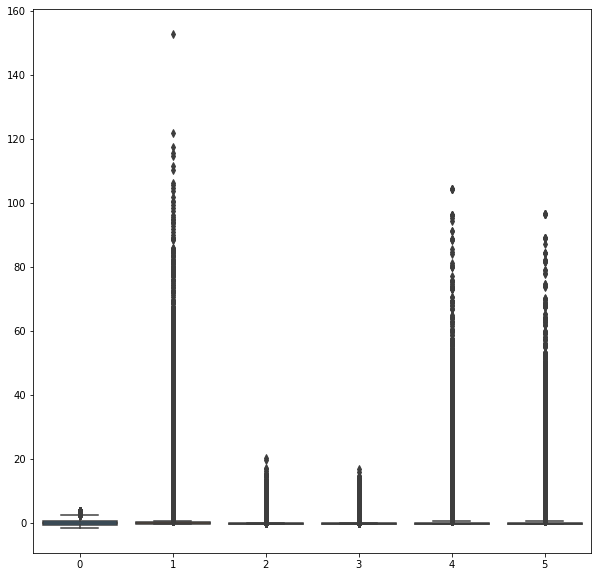

In [48]:
cat1 = data[lis]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
cat1 = scalar.fit_transform(cat1)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=cat1,ax=ax)

In [49]:
cat.head(5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,tran
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1.455192e-11
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1.136868e-12
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.000000e+00
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.000000e+00
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.000000e+00


In [50]:
df = data

In [51]:
df['type'] = df['type'].map({"CASH_OUT": 0,"PAYMENT":1,"CASH_IN":2,"TRANSFER":3,"DEBIT":4})

In [52]:
def reout(df,feature,min1,max1):
    q = df[feature].quantile(min1)
    newData = df[df[feature] >q]
    q = df[feature].quantile(max1)
    newData = df[df[feature]<q]
    return newData

In [53]:
r = reout(df,"oldbalanceOrg",0.15,0.85)
newData = reout(r,"oldbalanceDest",0.15,0.85)

In [54]:
newData.drop("nameOrig",axis =1,inplace = True)
newData.drop("nameDest",axis =1,inplace = True)
newData.drop("isFlaggedFraud",axis =1,inplace = True)
newData["var"] =abs(abs(newData["oldbalanceOrg"]-newData["newbalanceOrig"])+abs(newData["oldbalanceDest"]-newData["newbalanceDest"])-newData["amount"]) 

C:\Users\Mukul\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-54-e69a8f340f5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["var"] =abs(abs(newData["oldbalanceOrg"]-newData["newbalanceOrig"])+abs(newData["oldbalanceDest"]-newData["newbalanceDest"])-newData["amount"])


In [55]:
newData['isFraud'] = newData['isFraud'].map({1: 'yes', 0: 'no'})

<ipython-input-55-fd9925eb766b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['isFraud'] = newData['isFraud'].map({1: 'yes', 0: 'no'})


<AxesSubplot:>

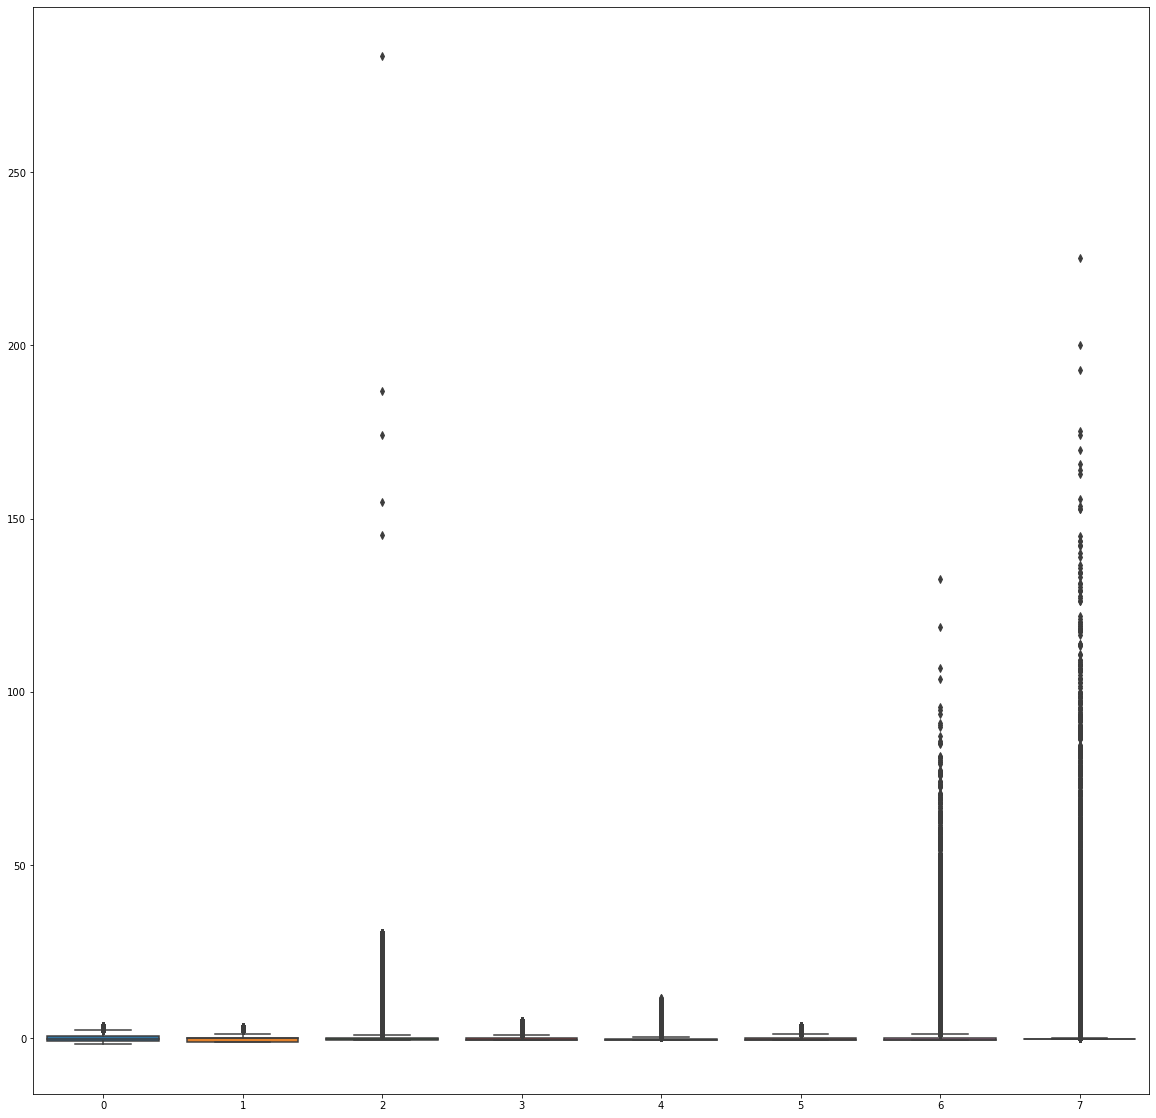

In [56]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = newData.drop(columns = 'isFraud', axis = 1)
y = newData.isFraud
x_scaled = scalar.fit_transform(x)
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y , test_size = .20, random_state=144,stratify=y)

In [58]:
def fit_predict(t):
    start_time = time.time()
    t.fit(x_train, y_train)
    end_time = time.time()
    print("Training time: ",end_time-start_time)
    start_time = time.time()
    y_test_predict = t.predict(x_test)
    end_time = time.time()
    print("Testing time: ",end_time-start_time)
    return y_test_predict  
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_mat(y_test,f):
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
      confusion_matrix(y_test, f))
    cmp.plot(ax=ax)
    plt.show();
def accuracy(y_true, y_pred):
    correct_predictions = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_predictions += 1
    print("accuracy = " + str(correct_predictions / len(y_true)))   

In [59]:
from sklearn.metrics import recall_score, precision_score, f1_score
def metrics(y_test,y_pred):
    print("*********micro  *******")
    print('Recall : %.3f' % recall_score(y_test, y_pred,average='micro'))
    print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))
    print("*********macro  *******")
    print('Recall : %.3f' % recall_score(y_test, y_pred,average='macro'))
    print('Precision: %.3f' % precision_score(y_test, y_pred,average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='macro'))
def evaluating_model(model,actual_val):
    print("*****predicting values****")
    f = fit_predict(model)
    print()
    print("******evaluating model ****")
    accuracy(f,actual_val)
    print()
    metrics(f,actual_val)
    print()
    plot_mat(actual_val,f)
    print("********")    

In [60]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
model2 = SVC()
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=30)

# logistic regression

*****predicting values****
Training time:  20.56640911102295
Testing time:  0.03127026557922363

******evaluating model ****
accuracy = 0.9993963447861048

*********micro  *******
Recall : 0.999
Precision: 0.999
F1 Score: 0.999
*********macro  *******
Recall : 0.916
Precision: 0.653
F1 Score: 0.724



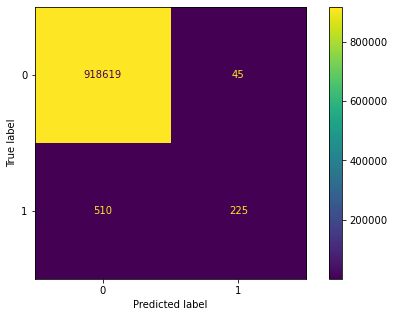

********


In [61]:
evaluating_model(model1,y_test)

# svc

*****predicting values****
Training time:  870.0869598388672
Testing time:  60.643378019332886

******evaluating model ****
accuracy = 0.9995475305063416

*********micro  *******
Recall : 1.000
Precision: 1.000
F1 Score: 1.000
*********macro  *******
Recall : 0.991
Precision: 0.721
F1 Score: 0.805



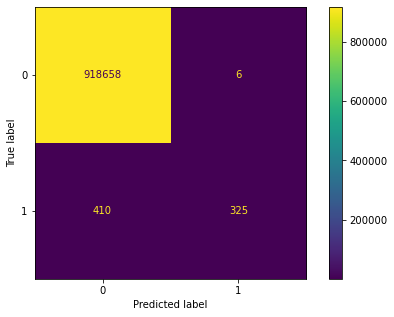

********


In [62]:
evaluating_model(model2,y_test)

# parameter tuninf for svc

# Knn

*****predicting values****
Training time:  3155.1781771183014
Testing time:  135.96551728248596

******evaluating model ****
accuracy = 0.9995790728508515

*********micro  *******
Recall : 1.000
Precision: 1.000
F1 Score: 1.000
*********macro  *******
Recall : 0.942
Precision: 0.772
F1 Score: 0.837



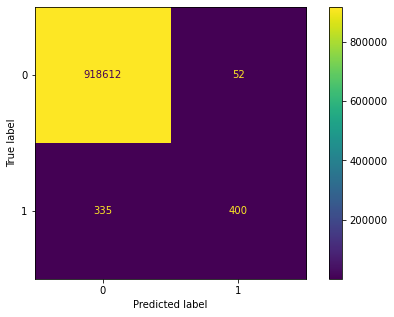

********


In [63]:
evaluating_model(model4,y_test)

# knn after parameter tuning 

# random forest classifier

*****predicting values****
Training time:  205.6344883441925
Testing time:  2.037482261657715

******evaluating model ****
accuracy = 0.9996889272231099

*********micro  *******
Recall : 1.000
Precision: 1.000
F1 Score: 1.000
*********macro  *******
Recall : 0.982
Precision: 0.817
F1 Score: 0.883



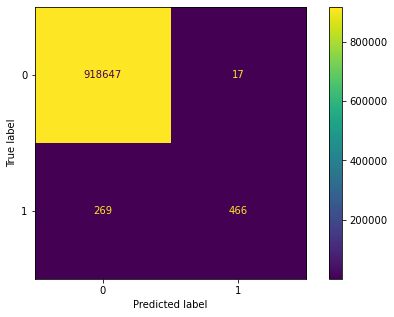

********


In [64]:
evaluating_model(model6,y_test)

# random forest parameter tuning

In [ ]:
classifier = model5

# Model deployment

In [66]:
import pickle 
pickle_file = open("classifier.pkl", "wb")
pickle.dump(classifier, pickle_file)
pickle_file.close()

NameError: name 'classifier' is not defined

In [67]:
%%writefile app.py
import numpy as np
import pickle
import pandas as pd
#from flasgger import Swagger
import streamlit as st 

from PIL import Image

pickle_in = open('/content/classifier.pkl', "rb")
classifier = pickle.load(pickle_in)

def welcome():
    return "Welcome All"

#@app.route('/predict',methods=["Get"])
def predict_note_authentication(step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,var):
    
    """Let's check for transaction 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name:step 
        in: query
        type: number
        required: true
      - name:amount 
        in: query
        type: number
        required: true
      - name: oldbalanceOrg
        in: query
        type: number
        required: true
      - name: newbalanceOrig
        in: query
        type: number
        required: true
      - name: oldbalanceDest
        in: query
        type: number
        required: true
      - name:newbalanceDest
        in: query
        type: number
        required: true
      - name:var
        in: query
        type: number
        required: true
    responses:
        200:
            description: The output values
        
    """
   
    prediction=classifier.predict([[step,amount,type1,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,var]])
    print(prediction)
    return prediction



def main():
    st.title("fruad detector")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Fruad detector Machine Learning App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    step = st.text_input("step","Type Here")
    amount = st.text_input("amount","Type Here")
    type1 = st.text_input("type","Type Here")
    oldbalanceOrg = st.text_input("oldbalanceOrg","Type Here")
    newbalanceOrig = st.text_input("newbalanceOrig","Type Here")
    oldbalanceDest = st.text_input("oldbalanceDest","Type Here")
    newbalanceDest = st.text_input("newbalanceDest","Type Here")
    var = abs(abs(newbalanceOrig-oldbalanceOrg)+abs(newbalanceDest-oldbalanceDest)-amount)
    result=""
    if st.button("Predict"):
        result=predict_note_authentication(step,amount,type1,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,var)
    st.success('The model prediction is {}'.format(result))
    if st.button("About"):
        st.text("Lets Learn Together")

if __name__=='__main__':
    main()

Overwriting app.py


In [68]:
ls

 Volume in drive D is Data
 Volume Serial Number is 125B-8C1E

 Directory of D:\fruad_detection

26-Jul-22  03:00 PM    <DIR>          .
23-Jul-22  07:39 PM    <DIR>          .ipynb_checkpoints
26-Jul-22  04:55 PM             2,580 app.py
26-Jul-22  04:55 PM                 0 classifier.pkl
20-Jul-22  02:21 PM             1,298 Data Dictionary.txt
20-Jul-22  05:39 PM       493,534,783 Fraud.csv
26-Jul-22  03:00 PM         1,310,141 fraud_detection.ipynb
20-Jul-22  06:22 PM           260,381 Screenshot (354).png
20-Jul-22  02:19 PM           479,882 Task Details.pdf
23-Jul-22  07:45 PM             2,217 Untitled.ipynb
               8 File(s)    495,591,282 bytes
               2 Dir(s)  992,515,121,152 bytes free
